# 1

## a

In [1]:
%pylab inline

n = 100

A = [[2, -1]+[0]*(n-2)]+[[0]*j + [-1, 2, -1] + [0]*(n-j-3) for j in range(n-2)]+[[0]*(n-2)+[-1, 2]]
b = [[j] for j in range(n)]

Populating the interactive namespace from numpy and matplotlib


## b

In [2]:
def conditionNumber(M):
    return norm(M)*norm(inv(M))

print(conditionNumber(A))

26298.1554486


## c

In [3]:
A_inv = inv(A)
x_explicit = dot(A_inv, b)

print(norm(dot(A, x_explicit) - b))

1.78502092972e-10


## d

In [4]:
x_numerical = solve(A, b)

print(norm(dot(A, x_numerical) - b))

6.95272860089e-11


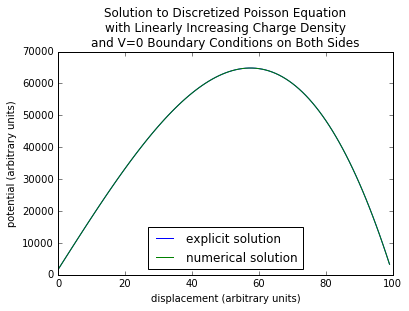

In [5]:
pyplot.plot(b, x_explicit, label='explicit solution')
pyplot.plot(b, x_numerical, label='numerical solution')
pyplot.legend(loc='best')
pyplot.xlabel('displacement (arbitrary units)')
pyplot.ylabel('potential (arbitrary units)')
pyplot.title('Solution to Discretized Poisson Equation\nwith Linearly Increasing Charge Density\n\
and V=0 Boundary Conditions on Both Sides')

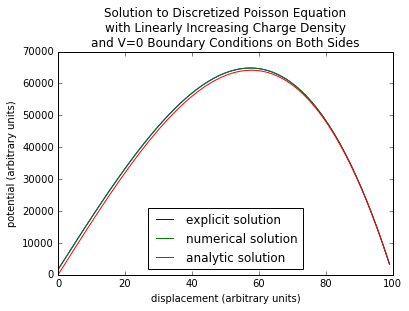

In [6]:
pyplot.plot(b, x_explicit, label='explicit solution')
pyplot.plot(b, x_numerical, label='numerical solution')
x_exact = [[x*(n**2-x**2)/6] for x in flatten(b)]
pyplot.plot(b, x_exact, label='analytic solution')
pyplot.legend(loc='best')
pyplot.xlabel('displacement (arbitrary units)')
pyplot.ylabel('potential (arbitrary units)')
pyplot.title('Solution to Discretized Poisson Equation\nwith Linearly Increasing Charge Density\n\
and V=0 Boundary Conditions on Both Sides')

# 2

For a large number of iterations, each successive iteration multiplies the norm of the error by the spectral radius of **P**. A smaller spectral radius leads to faster reduction in error and therefore faster convergence. If the specral radius is not less than 1, the method will not converge.

# 3

Jacobi method:

In [7]:
%%latex
\begin{gather*}
\vec{x}_1 = \begin{pmatrix}
0.4\\
2.2\\
0.9\\
1
\end{pmatrix}\\\\
\vec{x}_2 = \begin{pmatrix}
2.1\\
2.6833\\
1.1\\
1
\end{pmatrix}
\end{gather*}

<IPython.core.display.Latex object>

Gauss-Seidel method

Since the system is upper-triangular, doing Gauss-Seidel iteration starting from the top would be the same as using the Jacobi method, so I will iterate from the bottom.

In [8]:
%%latex
\begin{gather*}
\vec{x}_1 = \begin{pmatrix}
2.0666\\
2.7166\\
1.1\\
1
\end{pmatrix}\\\\
\vec{x}_2 = \begin{pmatrix}
2.0666\\
2.7166\\
1.1\\
1
\end{pmatrix}
\end{gather*}

<IPython.core.display.Latex object>

The second iteration is the same as the first one because this system happens to converge in one step with this method.

SOR with $\omega = 1$

Iterating from the top

In [9]:
%%latex
\begin{gather*}
\vec{x}_1 = \begin{pmatrix}
.44\\
2.42\\
0.99\\
1.1
\end{pmatrix}\\\\
\vec{x}_2 = \begin{pmatrix}
1.9635\\
2.726166\\
1.133\\
0.99
\end{pmatrix}
\end{gather*}


<IPython.core.display.Latex object>

# 4

## a

In [10]:
def Jacobi(A, b, x_0 = None, tolerance = 1e-6, toleranceType = 'abs'):
    if x_0 == None:
        x_0 = zeros(shape(b))
    
    n = shape(b)[0]
    xprev = copy(x_0)
    x = copy(xprev)
    
    iterations = 0
    err = tolerance+1
    
    while (err > tolerance and iterations < 1000):
        x, xprev = xprev, x
        for i in range(n):
            x[i][0] = (b[i][0] - sum(A[i][j]*xprev[j][0] for j in range(n) if i != j)) / A[i][i]
        
        err = norm(x-xprev)
        if (toleranceType in ['rel', 'relative']):
            err /= norm(x)
        
        iterations += 1
        
    
    return x, iterations, err

In [11]:
def Gauss_Seidel(A, b, x_0 = None, tolerance = 1e-6, toleranceType = 'abs'):
    if x_0 == None:
        x_0 = zeros(shape(b))
    
    n = shape(b)[0]
    x = copy(x_0)
    
    iterations = 0
    err = tolerance+1
    
    while (err > tolerance and iterations < 1000):
        err_sq = 0
        for i in range(n):
            prev = x[i][0]
            x[i][0] = (b[i][0] - sum(A[i][j]*x[j][0] for j in range(n) if i != j)) / A[i][i]
            err_sq += (x[i][0] - prev)**2
        
        err = err_sq**.5
        if (toleranceType in ['rel', 'relative']):
            err /= norm(x)
        
        iterations += 1
        
    
    return x, iterations, err

In [12]:
def SOR(A, b, omega, x_0 = None, tolerance = 1e-6, toleranceType = 'abs'):
    if x_0 == None:
        x_0 = zeros(shape(b))
    
    n = shape(b)[0]
    x = copy(x_0)
    
    iterations = 0
    err = tolerance+1
    
    while (err > tolerance and iterations < 1000):
        err_sq = 0
        for i in range(n):
            prev = x[i][0]
            x[i][0] = (1-omega)*x[i][0] + omega*(b[i][0] - sum(A[i][j]*x[j][0] for j in range(n) if i != j)) / A[i][i]
            err_sq += (x[i][0] - prev)**2
        
        err = err_sq**.5
        if (toleranceType in ['rel', 'relative']):
            err /= norm(x)
        
        iterations += 1
        
    
    return x, iterations, err

In [13]:
n = 5

A = array([[3, -1]+[0]*(n-2)]+[[0]*j + [-1, 3, -1] + [0]*(n-j-3) for j in range(n-2)]+[[0]*(n-2)+[-1, 3]], dtype=float)
b = array([[100] for j in range(n)], dtype=float)
x_0 = array([[0] for j in range(n)], dtype=float)
tol = 1e-6

x, iterations, error = Jacobi(A, b, x_0, tol)

print("Jacobi method:")
print(x)
print("iterations:", iterations)
print("error norm:", error)

x, iterations, error = Gauss_Seidel(A, b, x_0, tol)

print("\n\nGauss-Seidel method:")
print(x)
print("iterations:", iterations)
print("error norm:", error)

x, iterations, error = SOR(A, b, 1.15, x_0, tol)

print("\n\nSuccessive Over-Relaxation:")
print(x)
print("iterations:", iterations)
print("error norm:", error)



Jacobi method:
[[ 61.11111072]
 [ 83.33333269]
 [ 88.88888811]
 [ 83.33333269]
 [ 61.11111072]]
iterations: 34
error norm: 9.65787172467e-07


Gauss-Seidel method:
[[ 61.11111091]
 [ 83.33333313]
 [ 88.88888876]
 [ 83.33333327]
 [ 61.11111109]]
iterations: 19
error norm: 6.43416345311e-07


Successive Over-Relaxation:
[[ 61.1111111 ]
 [ 83.33333333]
 [ 88.88888888]
 [ 83.33333333]
 [ 61.11111111]]
iterations: 13
error norm: 7.60031171772e-08


C:\Users\ablank\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


# 5

## a

In [14]:
tol = 1e-6
print("relative tolerance:", tol)

x, iterations, error = Jacobi(A, b, x_0, tol, toleranceType = 'rel')

print("\n\tJacobi method:")
print("\t\titerations:", iterations)

x, iterations, error = Gauss_Seidel(A, b, x_0, tol, toleranceType = 'rel')

print("\n\tGauss-Seidel method:")
print("\t\titerations:", iterations)

x, iterations, error = SOR(A, b, 1.15, x_0, tol, toleranceType = 'rel')

print("\n\tsuccessive over-relaxation:")
print("\t\titerations:", iterations)

tol = 1e-8
print("\n\nrelative tolerance:", tol)

x, iterations, error = Jacobi(A, b, x_0, tol, toleranceType = 'rel')

print("\n\tJacobi method:")
print("\t\titerations:", iterations)

x, iterations, error = Gauss_Seidel(A, b, x_0, tol, toleranceType = 'rel')

print("\n\tGauss-Seidel method:")
print("\t\titerations:", iterations)

x, iterations, error = SOR(A, b, 1.15, x_0, tol, toleranceType = 'rel')

print("\n\tsuccessive over-relaxation:")
print("\t\titerations:", iterations)

relative tolerance: 1e-06

	Jacobi method:
		iterations: 25

	Gauss-Seidel method:
		iterations: 14

	successive over-relaxation:
		iterations: 9


relative tolerance: 1e-08

	Jacobi method:
		iterations: 33

	Gauss-Seidel method:
		iterations: 19

	successive over-relaxation:
		iterations: 13


C:\Users\ablank\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


The relative error is the absolute error divided by the norm of the vector, which is about 125.31. Iterating to a relative tolerance of $10^{-8}$ and an absolute tolerance of $10^{-6}$ give similar results because the factor of 100 between them is close to 125.31. Successive over-relaxation converges the fastest of the three methods. Convergence occurs sooner when the tolerance is higher.

## b

C:\Users\ablank\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  from ipykernel import kernelapp as app


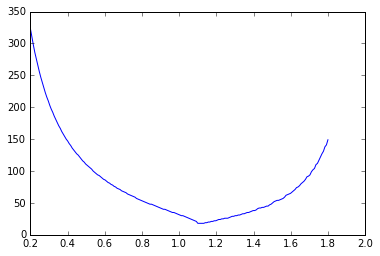

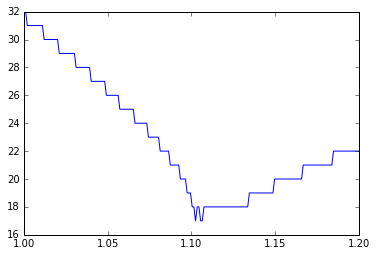

1.13097776017
13


In [15]:
from scipy import optimize

def SORIterations(omega, tol = 1e-12):
    return SOR(A, b, omega, x_0, tol)[1]
    
space = linspace(.2, 1.8, 200)
y = [SORIterations(a) for a in space]

pyplot.plot(space, y)
pyplot.show()

space = linspace(1, 1.2, 200)
y = [SORIterations(a) for a in space]

pyplot.plot(space, y)
pyplot.show()

omega_optimal = optimize.minimize_scalar(SORIterations, bounds = (.1, 2), method = 'bounded').x
print(omega_optimal)
print(SOR(A, b, omega_optimal, x_0, tol)[1])

The optimal value of $\omega$ for this matrix was found to be around 1.13 using scipy's `optimize` library, which leads to convergence to an absolute tolerance of $10^{-12}$ in 13 iterations. For tighter tolerance values, the plot becomes spikier and eventually has places where the value of omega leads to divergence. This is interesting.